<a href="https://colab.research.google.com/github/Wytamma/BEAST-GPU-WORKSHOP/blob/main/BEAST_GPU_WORKSHOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BEAST - example notebook

This notebook takes advantage of the free GPUs provided by google and uses beastiary to visualise the results in real-time.

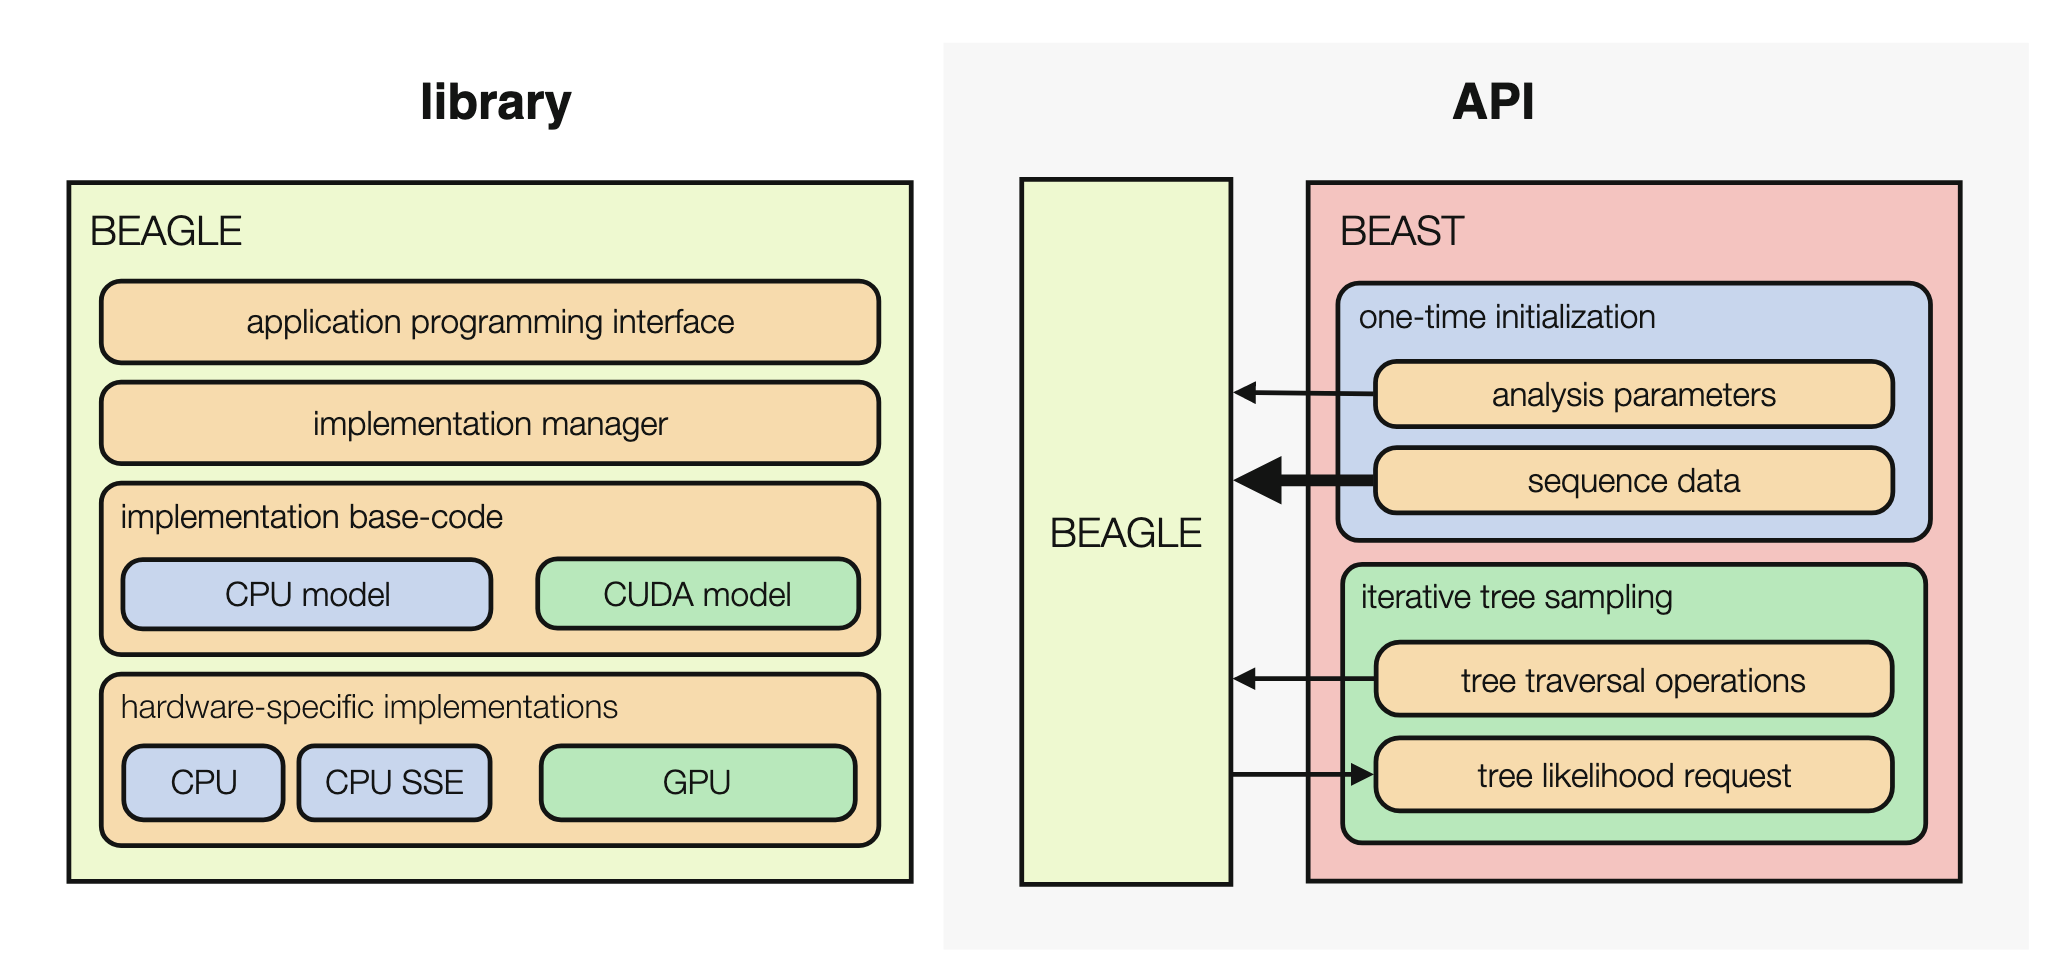

# Install requirements

This group of cells will install all the requirements and set up the envrioment. Enable the free Nvidia GPU (Edit > Notebook settings > Hardware accelerator > GPU)

In [1]:
#@title Check Nvidia GPU
import ipywidgets as widgets
import psutil
from time import sleep, time
from pathlib import Path
import shlex, subprocess

def get_compute(name):
  if 'A100' in name:
    return '80'
  elif 'V100' in name:
    return '70'
  elif 'P4' in name:
    return '61'
  elif 'T4' in name:
    return '75'
  elif 'P100' in name:
    return '60'
  elif 'K80' in name:
    return '37'
def get_packagemanager_list(output):
  lines = outpack[4:]
  listofpack = []
  for package in lines:
    listofpack.append(package.split()[0])
  return listofpack

!nvidia-smi
Gcardinfo = !nvidia-smi --query-gpu=gpu_name,memory.total --format=csv,noheader,nounits
Gcardname, Gcardram = Gcardinfo[0].split(', ')

Wed Nov  6 22:03:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
%%capture
#@title Install BEAST2, Beagle and Beastiary
!pip install beastiary
checkinstall = Path('./BEAST2Beagle_READY')
%env LD_LIBRARY_PATH=/root/lib:/usr/lib64-nvidia
if not checkinstall.is_file():

    # !rm -fr ./beast
    # !wget https://github.com/CompEvol/beast2/releases/download/v2.7.7/BEAST.v2.7.7.Linux.x86.tgz
    # !tar -zxvf BEAST.v2.7.7.Linux.x86.tgz
    # !rm -fr BEAST.v2.7.7.Linux.x86.tgz
    !wget --quiet https://github.com/beast-dev/beast-mcmc/releases/download/v10.5.0-beta3/BEAST_X_v10.5.0-beta3.tgz -O BEAST_X_v10.5.0-beta3.tgz
    !tar -xzpf BEAST_X_v10.5.0-beta3.tgz && mv BEAST*/ BEAST_X_v10.5.0-beta3
    !rm BEAST_X_v10.5.0-beta3.tgz
    !mv BEAST_X_v10.5.0-beta3/bin/* /usr/local/bin
    !mv BEAST_X_v10.5.0-beta3/lib/* /usr/local/lib
    %cd /content
    !apt-get install build-essential autoconf automake libtool git pkg-config cmake openjdk-11-jdk
    # !sudo apt-get remove ocl-icd-libopencl1
    !rm -rf beagle-lib-4.0.1/
    !wget https://github.com/beagle-dev/beagle-lib/archive/refs/tags/v4.0.1.tar.gz
    !tar -zxvf v4.0.1.tar.gz
    !rm -fr v4.0.1.tar.gz
    %cd beagle-lib-4.0.1/
    !mkdir -p build
    %cd build
    !cmake -DCMAKE_INSTALL_PREFIX:PATH=$HOME -DBUILD_OPENCL=OFF -DBUILD_CUDA=ON ..
    !make install
    %cd /content
    !touch BEAST2Beagle_READY

In [3]:
#@title Check Beagle resources
!beast -beagle_info


   BEAST X v10.5.0-beta2 Prerelease #2b4f798d6, 2002-2024
       Bayesian Evolutionary Analysis Sampling Trees
                 Designed and developed by
   Alexei J. Drummond, Andrew Rambaut and Marc A. Suchard
                              
               Department of Computer Science
                   University of Auckland
                  alexei@cs.auckland.ac.nz
                              
             Institute of Ecology and Evolution
                  University of Edinburgh
                     a.rambaut@ed.ac.uk
                              
              David Geffen School of Medicine
           University of California, Los Angeles
                     msuchard@ucla.edu
                              
                Downloads, Help & Resources:
                  	http://beast.community
                              
Source code distributed under the GNU Lesser General Public License:
          	http://github.com/beast-dev/beast-mcmc
                              


# Run Beast

In [4]:
!mkdir -p output
!mkdir -p output/CPU
!mkdir -p output/GPU

%cd /content/output/CPU
!nohup beast \
  -beagle_CPU \
  -overwrite \
  -prefix "CPU." \
  -seed 42 \
  /content/strict_0.5_0.1_1.xml > "/content/output/CPU/CPU.beast.out" &

%cd /content/output/GPU
!nohup beast \
  -beagle_multipartition off \
  -beagle_GPU \
  -beagle_cuda \
  -beagle_double \
  -beagle_scaling always \
  -beagle_order 1 \
  -overwrite \
  -prefix "GPU." \
  -seed 42 \
  /content/strict_0.5_0.1_1.xml > "/content/output/GPU/GPU.beast.out" &

%cd /content



/content/output/CPU
nohup: redirecting stderr to stdout
/content/output/GPU
nohup: redirecting stderr to stdout
/content


# Inspect the log files with beastiary

Wait for the `.log` files to appear before running this cell.

In [ ]:
#@title Inspect the log files with [beastiary](https://github.com/Wytamma/beastiary)

from IPython.display import Javascript
import os
import signal
from time import sleep
from glob import glob
import socket

path_to_log_files = '/content/output/*/*.log' #@param {type:"string"}

s = socket.socket()
s.bind(("", 0))
PORT = s.getsockname()[1]
s.close()

!beastiary --no-security --port {PORT} --share {path_to_log_files}



🐙🐁 STARTING BEASTIARY 🐁🐙

Adding log files:
✅ - /content/output/CPU/CPU.strict_0.5_0.1_1.log
✅ - /content/output/GPU/GPU.strict_0.5_0.1_1.log

Go to: http://127.0.0.1:51505/login?token=dd742bc1-1552-4e4d-acb5-cd62cc0d7c7c

Creating public shareable link...

Beastiary is now publicly accessible at: https://stephanie-hr-buck-jvc.trycloudflare.com
ERROR:    Exception in ASGI application
  + Exception Group Traceback (most recent call last):
  |   File "/usr/local/lib/python3.10/site-packages/starlette/middleware/base.py", line 108, in __call__
  |     response = await self.dispatch_func(request, call_next)
  |   File "/usr/local/lib/python3.10/site-packages/beastiary/api/main.py", line 82, in add_custom_header
  |     response = await call_next(request)
  |   File "/usr/local/lib/python3.10/site-packages/starlette/middleware/base.py", line 84, in call_next
  |     raise app_exc
  |   File "/usr/local/lib/python3.10/site-packages/starlette/middleware/base.py", line 70, in coro
  |     awa

In [ ]:
!rm -rf output BEAST2Beagle_READY

In [ ]:
!./beast/bin/beast --help

ls: cannot access 'output/GOU': No such file or directory


In [ ]:
!pwd

/content


In [ ]:
!kill 26203 24707 24730 24955 24978

/bin/bash: line 1: kill: (24707) - No such process
/bin/bash: line 1: kill: (24730) - No such process
/bin/bash: line 1: kill: (24955) - No such process
/bin/bash: line 1: kill: (24978) - No such process


In [ ]:
!top

=top - 14:48:47 up  1:03,  0 users,  load average: 5.55, 5.19, 4.16
Tasks:  17 total,   1 running,  15 sleeping,   0 stopped,   1 zombie
%Cpu(s):  0.5 us,  0.0 sy,  0.0 ni, 99.5 id,  0.0 wa,  0.0 hi,  0.0 si,  0.0 st
MiB Mem :  85480.5 total,  71733.8 free,   1268.0 used,  12478.7 buff/cache
MiB Swap:      0.0 total,      0.0 free,      0.0 used.  83323.6 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU  %MEM     TIME+ COMMAND                      
      1 root      20   0    1076      8      0 S   0.0   0.0   0:00.09 docker-init                  
      7 root      20   0  914692  70636  34076 S   0.0   0.1   0:13.87 node                         
      9 root      20   0    7376   3532   3232 S   0.0   0.0   0:02.11 oom_monitor.sh               
     11 root      20   0    7376   1904   1616 S   0.0   0.0   0:00.00 run.sh                       
     12 root      20   0 1237840  14736   8708 S   0.0   0.0   0:01.60 kernel_manager_              
     42 root      20   